In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
df = pd.read_csv('KNN_Project_Data')

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


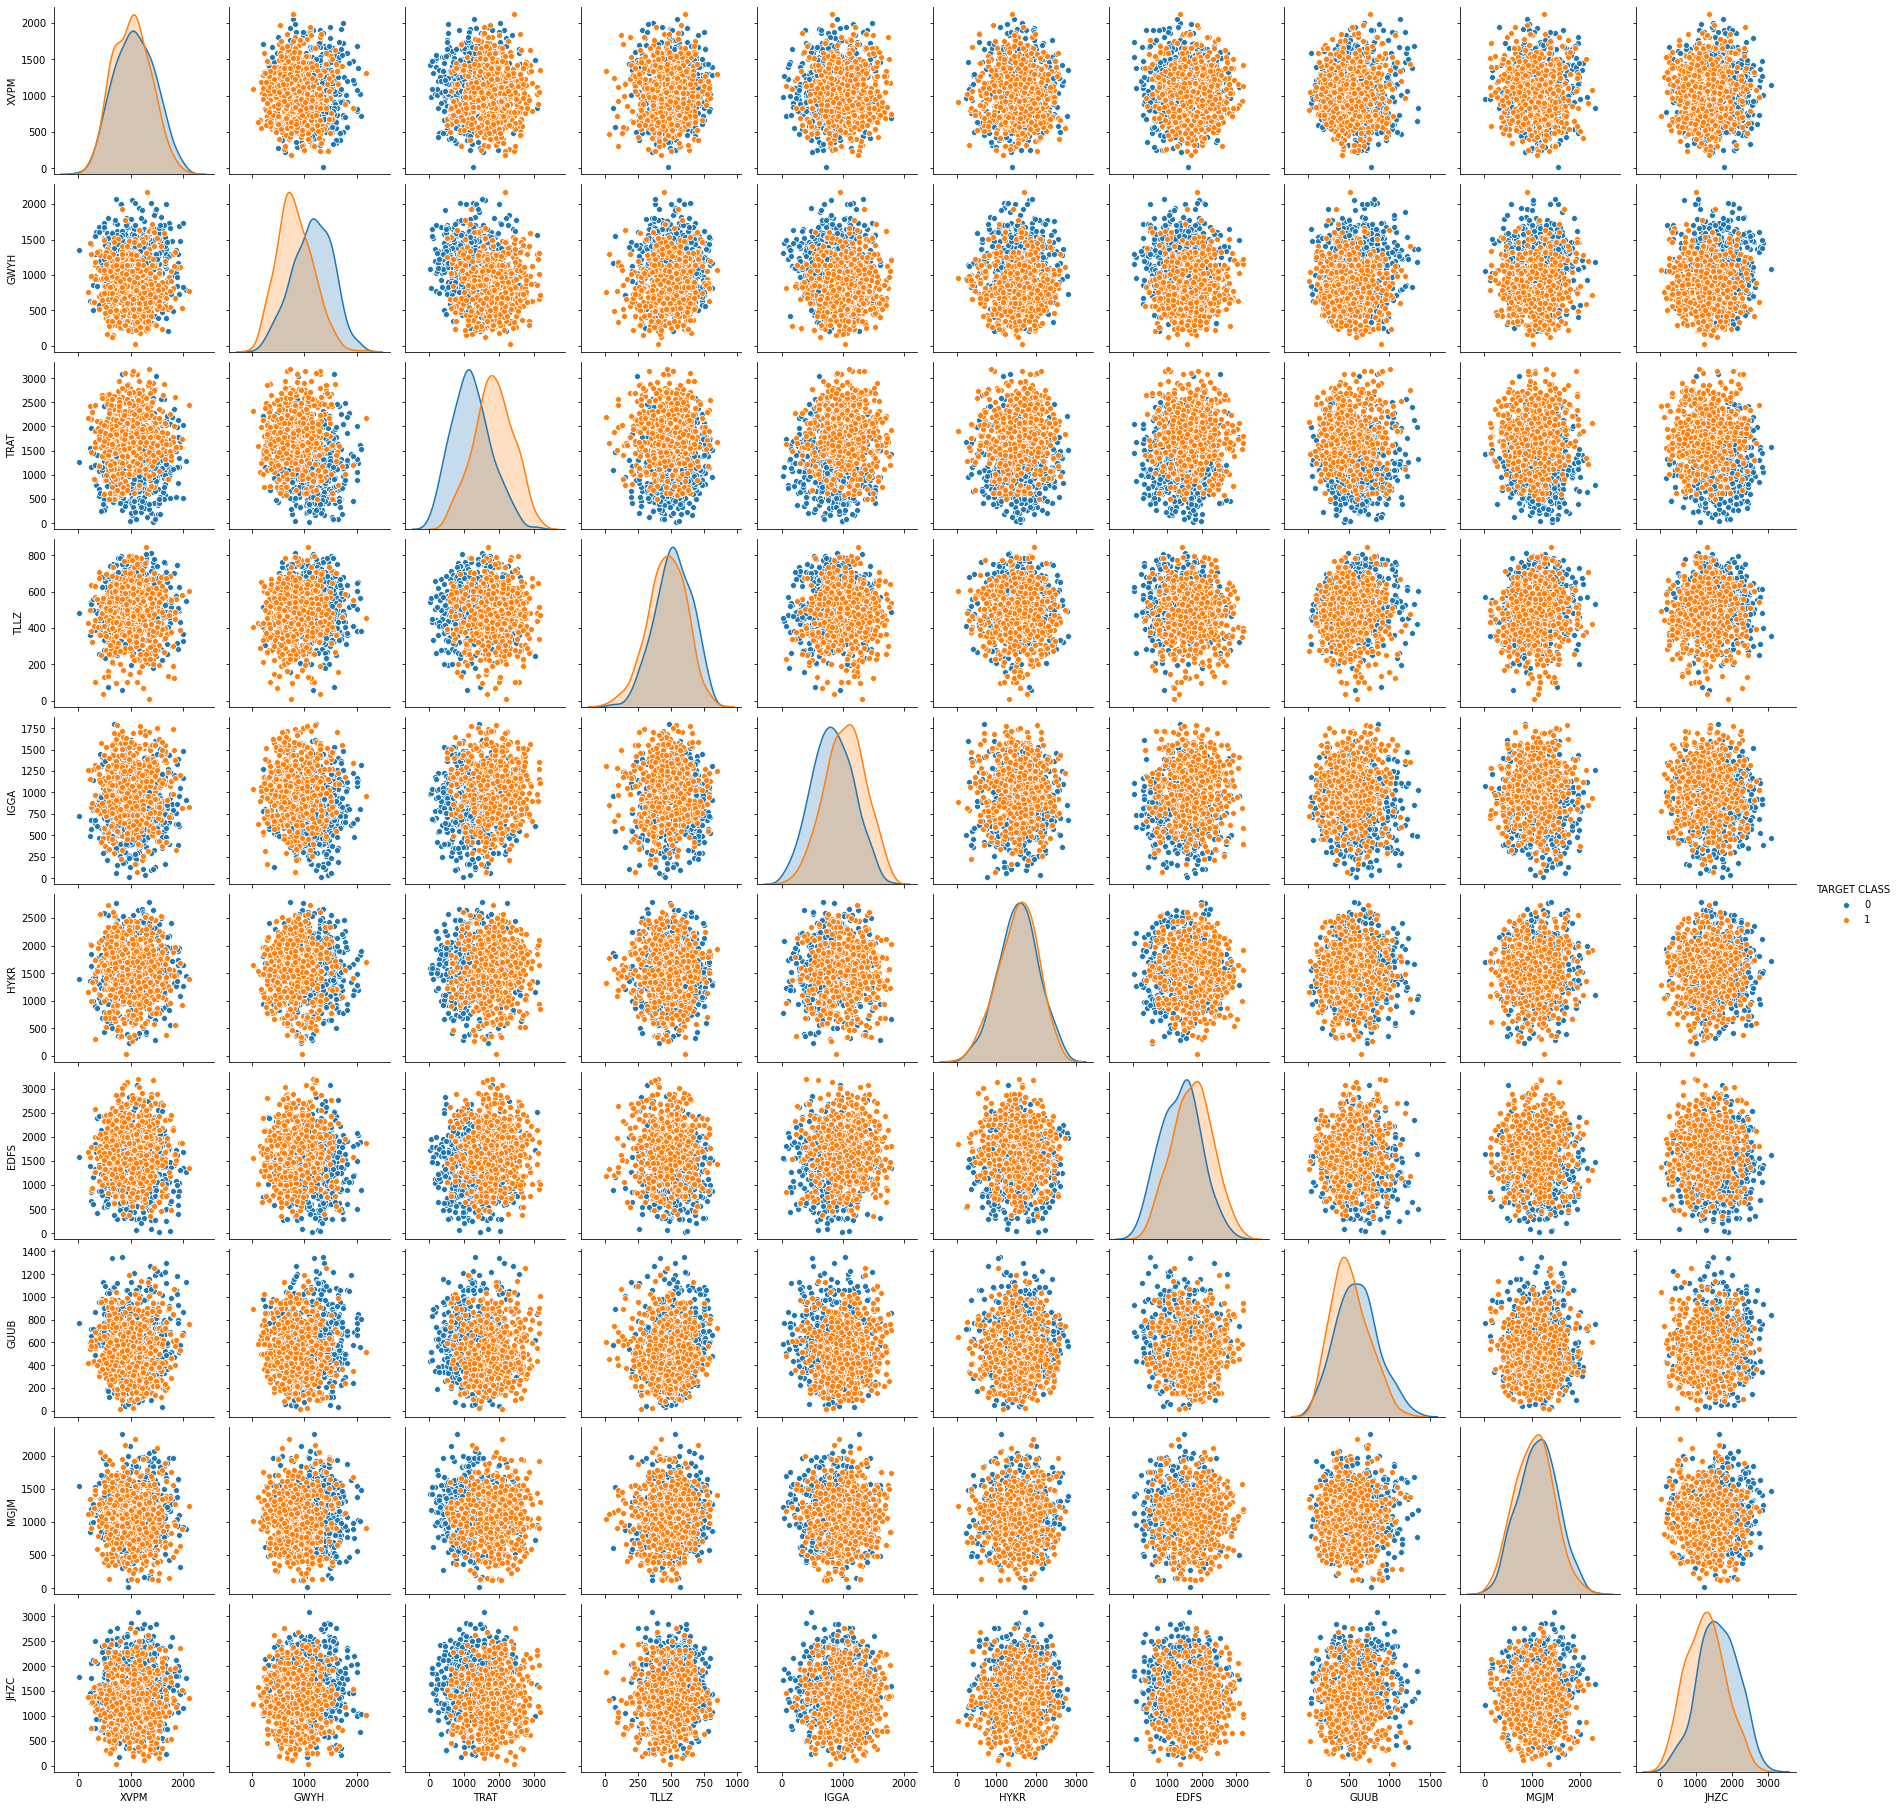

In [5]:
sns.pairplot(df, hue = 'TARGET CLASS')

In [6]:
X = df.drop('TARGET CLASS', axis = 1)
y = df['TARGET CLASS']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
a = pd.DataFrame(X_train, columns = X.columns)

In [13]:
a.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-2.131207,-0.029876,-0.070741,1.011517,-0.332789,-1.132088,-1.079541,0.190234,-0.459044,-0.293330
1,0.551623,-1.708943,0.268688,0.458320,1.216487,-0.080555,0.934718,-0.215476,0.294657,1.362008
2,0.492807,-1.186567,0.283564,-0.724657,-0.387366,-1.314568,1.201963,-1.494292,-0.505361,-0.628549
3,0.473814,0.376672,0.200586,0.409384,-1.979776,1.228047,1.800494,0.634393,1.210954,-0.144551
4,-0.025188,-0.425766,1.465413,0.357559,0.641439,0.316196,0.519274,-0.551063,-0.064037,-2.187418


In [14]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
y_pred = knn.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [20]:
print(confusion_matrix(y_test, y_pred))

[[110  42]
 [ 41 107]]


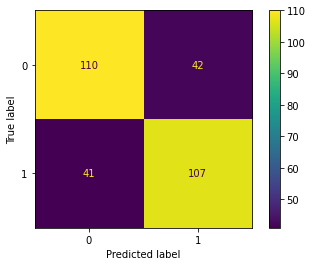

In [21]:
plot_confusion_matrix(knn, X_test, y_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       152
           1       0.72      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



## Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

In [25]:
knn_params = {'n_neighbors' : np.arange(1, 50)}

In [26]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

In [27]:
knn_cv_model.best_params_

{'n_neighbors': 46}

In [29]:
knn_tuned = KNeighborsClassifier(n_neighbors = 46).fit(X_train, y_train)

In [30]:
y_pred = knn_tuned.predict(X_test)

In [31]:
print(confusion_matrix(y_test, y_pred))

[[125  27]
 [ 22 126]]


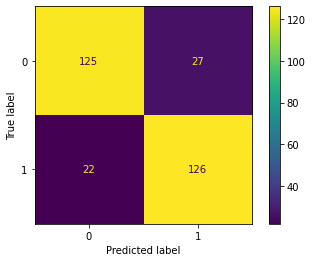

In [33]:
plot_confusion_matrix(knn_tuned, X_test, y_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       152
           1       0.82      0.85      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

